# Quick Analysis of Chunk Size Tests

In [1]:
import pandas as pd

def find_fastest_schedule(data):
    for mat_size in data['matrix size'].unique():
        max_rate_i = data[(data['matrix size'] == mat_size)]\
                   ['Gigaentries per second'].idxmax()
        print(data.loc[max_rate_i])
        print("ratio of chunk size to mat size:", 
              data.loc[max_rate_i, 'chunk size']/data.loc[max_rate_i, 'matrix size'],
              '\n')

In [2]:
print('outer row loop')
df1 = pd.read_csv('./chunk-size-tests-01-outer-row-loop.csv')
find_fastest_schedule(df1)
print('\n\ninner row loop')
df2 = pd.read_csv('./chunk-size-tests-02-inner-row-loop.csv')
find_fastest_schedule(df2)
print('\n\ncollapsed for loops')
df3 = pd.read_csv('./chunk-size-tests-03-collapsed-for-loops.csv')
find_fastest_schedule(df3)


outer row loop
schedule type             sequential
chunk size                         0
matrix size                      256
time (ms)                    1.23533
Gigaentries per second      0.005305
Name: 0, dtype: object
ratio of chunk size to mat size: 0.0 

schedule type             sequential
chunk size                         0
matrix size                      512
time (ms)                     10.519
Gigaentries per second      0.002492
Name: 1, dtype: object
ratio of chunk size to mat size: 0.0 

schedule type               static
chunk size                      16
matrix size                   1024
time (ms)                  59.4774
Gigaentries per second    0.001763
Name: 32, dtype: object
ratio of chunk size to mat size: 0.015625 

schedule type               guided
chunk size                      16
matrix size                   2048
time (ms)                  678.605
Gigaentries per second    0.000618
Name: 140, dtype: object
ratio of chunk size to mat size: 0.0078125 



i

## Results

Collpase(1) with static scheduling and a small chunk size seems to be the best. Let's explore more chunk sizes around 16

In [3]:
print('chunk sizes near 16')
df = pd.read_csv('./chunk-size-tests-04-chunk-size-near-16.csv')
find_fastest_schedule(df)

chunk sizes near 16
schedule type               static
chunk size                      22
matrix size                    256
time (ms)                  1.13805
Gigaentries per second    0.005759
Name: 12462, dtype: object
ratio of chunk size to mat size: 0.0859375 

schedule type               static
chunk size                      21
matrix size                    512
time (ms)                  3.82318
Gigaentries per second    0.006857
Name: 12522, dtype: object
ratio of chunk size to mat size: 0.041015625 

schedule type               static
chunk size                      18
matrix size                   1024
time (ms)                  20.6195
Gigaentries per second    0.005085
Name: 868, dtype: object
ratio of chunk size to mat size: 0.017578125 

schedule type              static
chunk size                     29
matrix size                  2048
time (ms)                 230.436
Gigaentries per second    0.00182
Name: 2404, dtype: object
ratio of chunk size to mat size: 0.014160

## Graph of Above Results

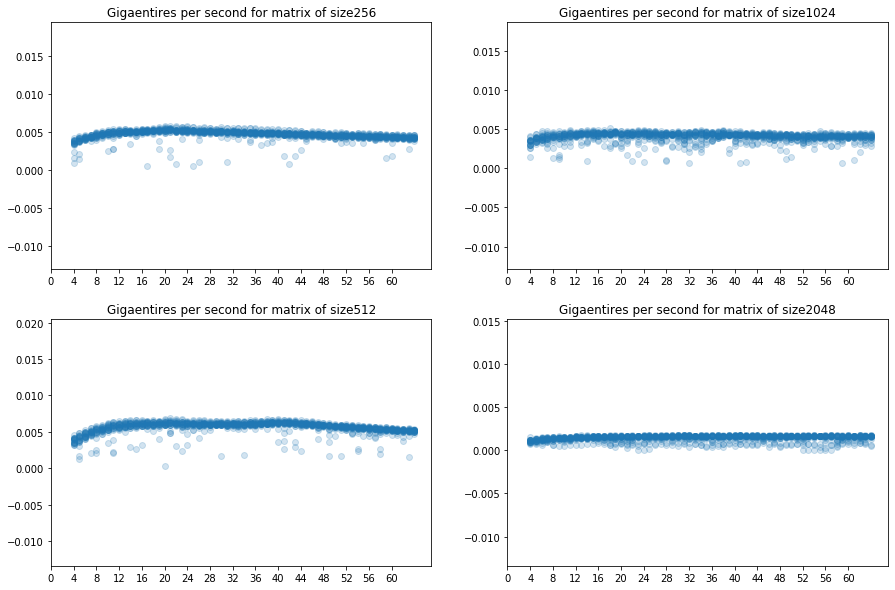

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15,10))

i = 0
j = 0
for mat_size in df['matrix size'].unique():
    df2 = df[df['matrix size'] == mat_size]
    
    x = df2[df2['schedule type'] == 'static']['chunk size']
    y = df2[df2['schedule type'] == 'static']['Gigaentries per second']
    axes[i][j].scatter(x, y, alpha=0.2)
    axes[i][j].set_title("Gigaentires per second for matrix of size" + str(mat_size))
    axes[i][j].set_xticks(np.arange(64, step=4))
    
    i += 1
    if i >= 2:
        i = 0
        j += 1
        
plt.show()